In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *
from implementations import *
from crossvalidation import *
from preprocessing import *
from plots import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

IMPORTING TRAINING DATA

In [2]:
filename = 'train.csv'
data_folder = './data/'
file_path = data_folder + filename
y,tx,ids,features = load_train_data(file_path)

DEALING WITH CATEGORICAL VARIABLES

In [3]:
tx = categorical_values(tx,22,4)

IDENTIFYING AND DELETING THE COLUMNS HAVING MISSING VALUES

In [5]:
tx=managing_missing_values(tx)

HANDLING OUTLIERS

In [6]:
tx=capping_outliers(tx)

STANDARDIZING FEATURE MATRIX

In [8]:
tx_train,mean,std = standardize(tx)

In [7]:
#cov_matr=1/tx_train.shape[0] * tx_train.T.dot(tx_train)

In [73]:
#plt.figure(figsize=(20,20))
#sns.heatmap(cov_matr.round(2), annot=True) 

CHOOSING THE APPROPRIATE NUMBER OF ITERATIONS

In [10]:
tx_train.shape

(250000, 26)

0.08464708776582303


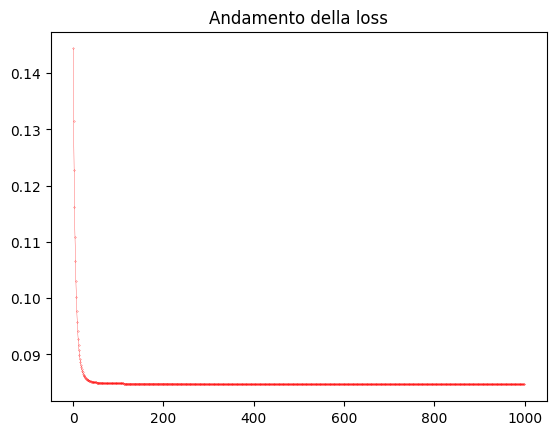

In [9]:
w0 = np.zeros(tx.shape[1])
choose_max_iter(y,tx_train,w0,1000,0.3)

CROSS VALIDATION FOR HYPERPARAMETERS

In [19]:
sample_indices = np.random.permutation(len(y))[:100000]
tx_sample = tx_train[sample_indices,:]
y_sample = y[sample_indices]

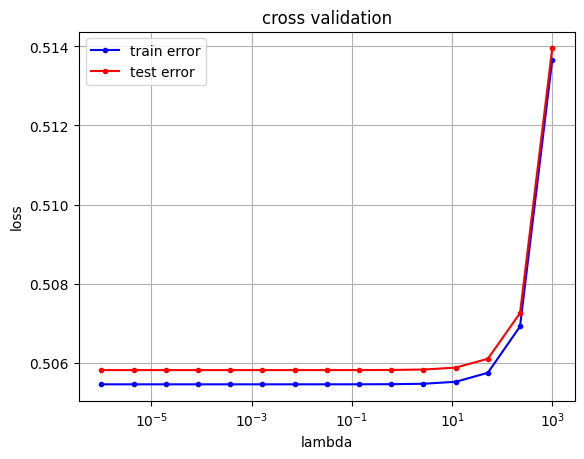

In [20]:
best_lambda,best_loss = cross_validation_demo(y_sample, tx_sample, k_fold=4, lambdas=np.logspace(-6,3,15), gamma=0.3, initial_w=w0, max_iters=300)

TRAINING THE MODEL

In [17]:
final_w,loss = logistic_regression(y,tx_train,initial_w = w0,max_iters = 300, gamma = 0.3)

LOADING TEST DATA AND HANDLING CATEGORICAL FEATURES

In [10]:
tx_test,test_ids=load_test_data('./data/test.csv')

In [11]:
tx_test = categorical_values(tx_test,22,4)

In [12]:
tx_test=managing_missing_values(tx_test)

STANDARDIZING DATA

In [13]:
temp_test = tx_test[:,:-4]
temp_test-= mean
temp_test/=std
tx_test[:,:-4]=temp_test

In [14]:
prediction = predict(tx_test,final_w,threshold = 0.55)

In [15]:
create_submission(test_ids,prediction,['Id','Prediction'],'./output/lambda10217102022.csv')